In [51]:
import os, sys, random, shutil
from os import listdir
import json
from pathlib import Path
import csv
import time
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn import preprocessing
from sklearn.tree import export_graphviz
import pydotplus
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

TRAINING = 'C:\\Users\\D\\Desktop\\feature_set_03\\'
CSV = 'C:\\Users\\D\\Desktop\\balanced_01\\'
print('ran')

ran


In [33]:
#convert articles to .csv 

# content = []

# for filename in os.listdir(TRAINING):
#     with open(TRAINING + filename, encoding="ISO-8859-1") as file:
#         data = json.load(file)
        
#         ID = str(data["altmetric_id"])
#         Title = str(data["citation"]["title"])
#         Author = str(data["citation"]["authors"][0])
#         Publisher = str(data["citation"]["publisher"])
#         Journal = str(data["citation"]["journal"])
#         Scopus = str(data["citation"]["scopus_subjects"][0])
#         altmetScore = str(data["altmetric_score"]["score"])
        
#         newRow = [ID, Title, Author, Publisher, Journal, Scopus, altmetScore]
#         content.append(newRow)
        
#     file.close()
    
# df = pd.DataFrame(content)
# df.columns = ['Alt_ID', 'Title', 'Author', 'Publisher', 'Journal', 'Scopus', 'Alt_Score']
  
# export_csv = df.to_csv(CSV, index = None, header=True)
# print('DONE')
# #print(df)


DONE


In [11]:
#set path environment so I can run the executible later
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz'

data = pd.read_csv('feature_set_03.csv')

print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

print ("Dataset:: ")
data = data.fillna(data.mean())
data.head()



Dataset Lenght::  180365
Dataset Shape::  (180365, 11)
Dataset:: 


,Altmetric ID,Altmetric Score,Journal Distribution,Journal Prestige,Publisher Distribution,Publisher Prestige,Scopus Distribution,Scopus Prestige,Author Productivity,Author Prestige,Popular
0,1541174,0.25,4374.0,8.95,5134.0,10.20,40995.0,6.03,3.000000,0.530000,no
1,10517201,2.00,9.0,4.07,3967.0,3.64,40995.0,6.03,4.113615,8.427456,no
2,20235318,0.75,21.0,3.21,7800.0,5.31,44837.0,9.27,4.113615,8.427456,no
3,17334887,0.50,9.0,4.08,40.0,11.94,4166.0,5.74,4.113615,8.427456,no
4,2006737,0.25,23.0,2.82,8222.0,10.81,40995.0,6.03,4.113615,8.427456,no


In [57]:
#Random Forest Classifier
#Predict Popularity

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

df = data

X = df[['Journal Distribution', 'Journal Prestige', 'Publisher Distribution',
       'Publisher Prestige', 'Scopus Distribution', 'Scopus Prestige']]
y = df['Popular']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy: 0.7122343374607282
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     27394
           1       0.71      0.71      0.71     26716

   micro avg       0.71      0.71      0.71     54110
   macro avg       0.71      0.71      0.71     54110
weighted avg       0.71      0.71      0.71     54110



In [56]:
#Naive Bayes Classifier
#Predict popularity

data = data.fillna(data.mean())

# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.3, random_state=int(time.time()))

# Instantiate the classifier
gnb = GaussianNB()
used_features =["Journal Distribution", "Journal Prestige",
                "Publisher Distribution", "Publisher Prestige",
                "Scopus Distribution", "Scopus Prestige"]

# Train classifier
gnb.fit(X_train[used_features].values, X_train["Popular"])
y_pred = gnb.predict(X_test[used_features])


# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Popular"] != y_pred).sum(),
          100*(1-(X_test["Popular"] != y_pred).sum()/X_test.shape[0])
))

print(classification_report(y_test, y_pred)) 

Number of mislabeled points out of a total 54110 points : 23383, performance 56.79%
              precision    recall  f1-score   support

           0       0.50      0.63      0.56     27029
           1       0.50      0.38      0.43     27081

   micro avg       0.50      0.50      0.50     54110
   macro avg       0.50      0.50      0.49     54110
weighted avg       0.50      0.50      0.49     54110



                   0              1              2              3  \
count  180365.000000  180365.000000  180365.000000  180365.000000   
mean      328.552763       6.147998    3058.548848       6.370392   
std       808.206128       8.082769    2764.015498       7.764204   
min         1.000000       0.000000       1.000000       0.000000   
25%        19.000000       2.420000     556.000000       3.180000   
50%        65.000000       3.730000    2338.000000       4.520000   
75%       202.000000       6.480000    5411.000000       7.700000   
max      4374.000000     298.900000    8222.000000     799.510000   

                   4              5  
count  180365.000000  180365.000000  
mean    26386.073945       6.555676  
std     16768.348171       3.702464  
min        15.000000       0.420000  
25%      8962.000000       4.690000  
50%     22209.000000       6.030000  
75%     40995.000000       9.270000  
max     44837.000000      23.260000  
Confusion Matrix:  [[14423 12535]
 [

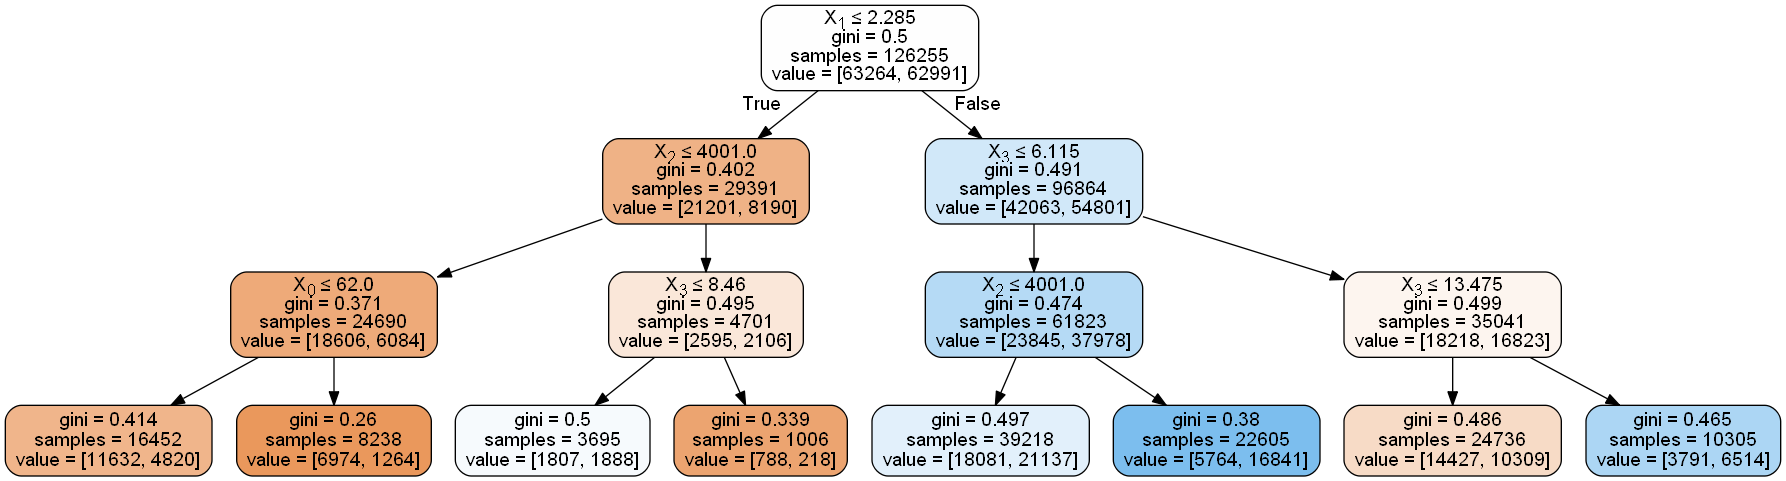

In [21]:
#Decision Tree Classsifier

#build clasifier without authors
X = data.values[:, 2:8]
Y = data.values[:,10]

Xp = pd.DataFrame(X)
Yp = pd.DataFrame(Y)
Xp = Xp.fillna(Xp.mean())
print(Xp.describe())
X = Xp.values[:]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

#gini
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print(classification_report(y_test, y_pred)) 


dot_data = StringIO()

#to display tree
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




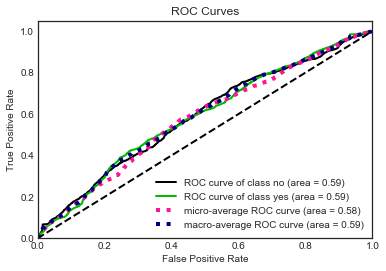

In [22]:
#build ROC curve for model
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

# The magic happens here
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

Confusion Matrix:  [[1595  903]
 [ 862 1353]]
Accuracy :  62.55039253129642
              precision    recall  f1-score   support

          no       0.65      0.64      0.64      2498
         yes       0.60      0.61      0.61      2215

   micro avg       0.63      0.63      0.63      4713
   macro avg       0.62      0.62      0.62      4713
weighted avg       0.63      0.63      0.63      4713



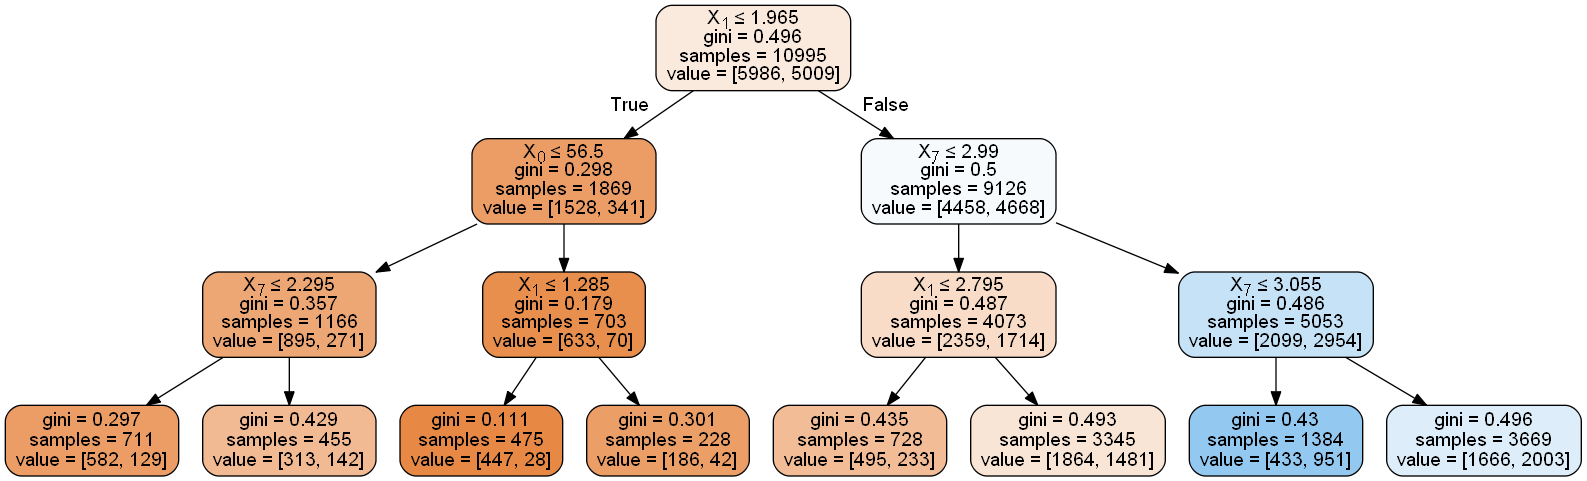

In [23]:
#test on all features including author

#drop all rows that don't contain author data
data = data.dropna(how='any')

X = data.values[:, 2:10]
Y = data.values[:,10]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

#gini
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print(classification_report(y_test, y_pred)) 


dot_data = StringIO()

#to display tree
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


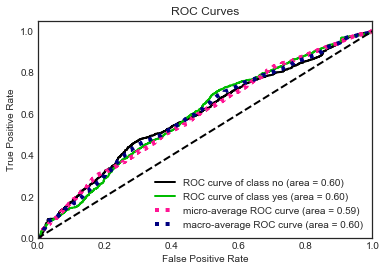

In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

# The magic happens here
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()